## Title : Fourier and Discrete Cosine Transformations of Images

🔴 **Type of Content** : Documentation

🔴 **Domain** : Machine Learning

🔴 **Module** : ML for Seqential Data & Visual Data

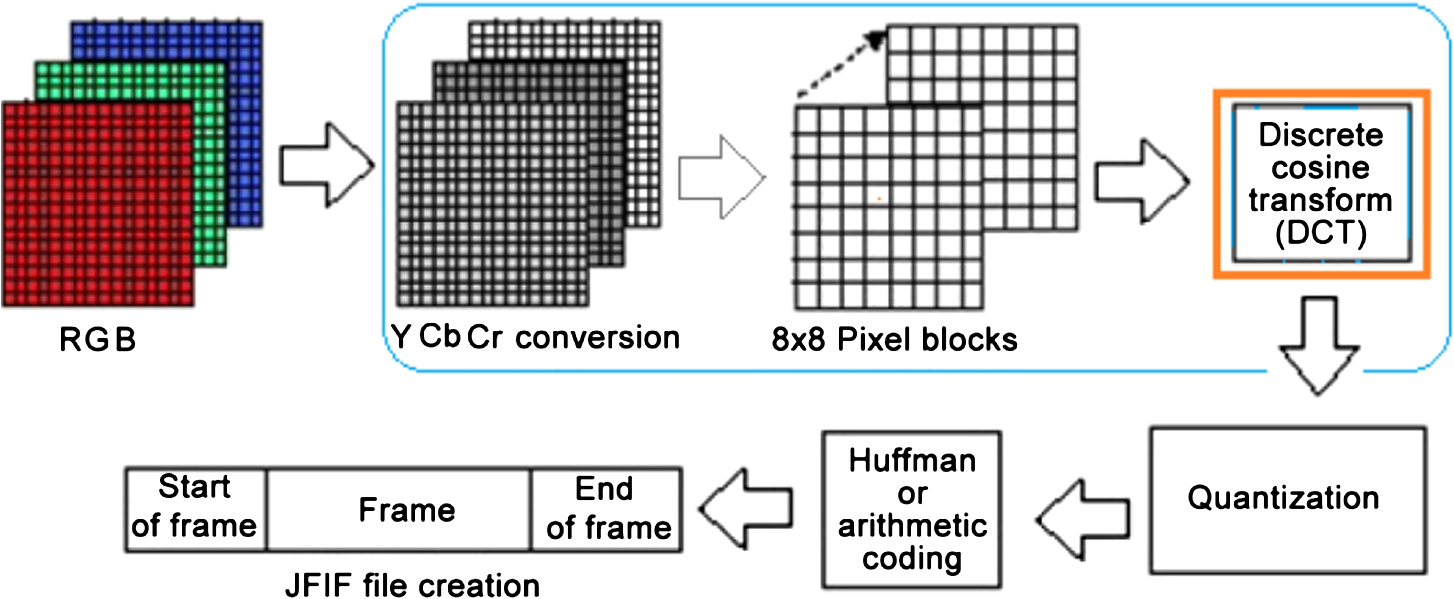

### What is DCT in images?
<p>
A discrete cosine transform (DCT) is a widely used transformation technique in signal processing and data compression which expresses a finite sequence of data points in terms of a sum of cosine functions oscillating at different frequencies.The DCT, first proposed by Nasir Ahmed in 1972.

The discrete cosine transform helps separate the image into parts (or spectral sub-bands) of differing importance (with respect to the image's visual quality). The DCT is similar to the discrete Fourier transform: it transforms a signal or image from the spatial domain to the frequency domain.
</p>

### DFT VS DCT:
<p>
The difference between the two is the type of basis function used by each transform; the DFT uses a set of harmonically-related complex exponential functions, while the DCT uses only (real-valued) cosine functions.

Usually,DCT is preferred over DFT in image compression algorithms like JPEG because DCT is a real transform which results in a single real number per data point. In contrast, a DFT results in a complex number (real and imaginary parts) which requires double the memory for storage.
</p>

### How DCT is performed on images?
<p>
The DCT works by separating images into parts of differing frequencies. During a step called quantization, where part of compression actually occurs, the less important frequencies are discarded, hence the use of the term "lossy". Then, only the most important frequencies that remain are used to retrieve the image in decomposition process. As a result, the reconstructed images contain some distortion but this distortion can be adjusted in the compresssion stage.

### Applications:

  1. Digital image
  2. Digital video
  3. Digital audio
  4. Digital Television
  5. Digital Radio
  6. Speech Coding
  7. Telecommunication networks
  8. Reducing Network bandwith usage
  9. Spectral Methods

Small example for the implementation of DCT (Direct Cosine Transform):

In [1]:
from scipy.fftpack import dct, idct
#idct stands for inverse DCT

In [2]:
# implement 2D DCT
def dct2(a):
    return dct(dct(a.T, norm='ortho').T, norm='ortho')

In [3]:
# implement 2D IDCT
def idct2(a):
    return idct(idct(a.T, norm='ortho').T, norm='ortho')  

In [4]:
from skimage.io import imread
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pylab as plt

In [6]:
# read cameraman RGB image and convert to grayscale
im = rgb2gray(imread('/content/cameraman.png')) 
imF = dct2(im)
im1 = idct2(imF)

In [7]:
# check if the reconstructed image is nearly equal to the original image
np.allclose(im, im1)
# True

True

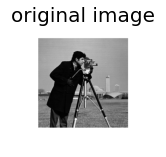

In [8]:
# plot original and reconstructed images with matplotlib.pylab
plt.gray()
plt.subplot(121), plt.imshow(im), plt.axis('off'), plt.title('original image', size=20)
plt.show()

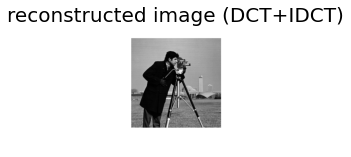

In [9]:
plt.subplot(122), plt.imshow(im1), plt.axis('off'), plt.title('reconstructed image (DCT+IDCT)', size=20)
plt.show()

Small example for the implementation of FT: (Fourier Transform)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2hsv, rgb2gray, rgb2yuv
from skimage import color, exposure, transform
from skimage.exposure import equalize_hist

In [11]:
dark_image = imread('/content/against_the_light.png')

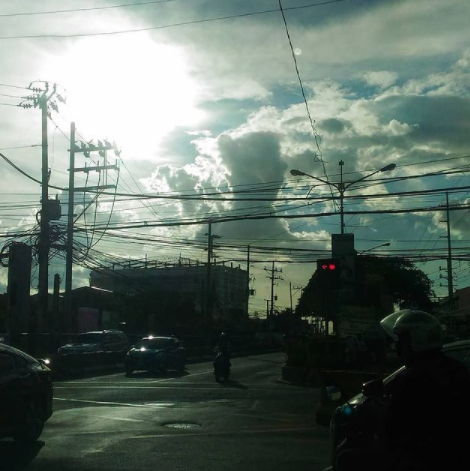

For this simple example we are trying to find a way to eliminate (or atleast drastically reduce) the powerlines in the back.

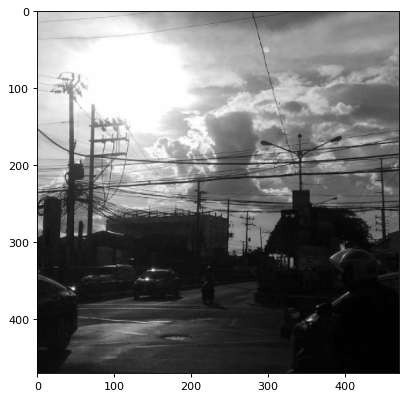

In [12]:
#converting our image into greyscale.
dark_image_grey = rgb2gray(dark_image)
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(dark_image_grey, cmap='gray');

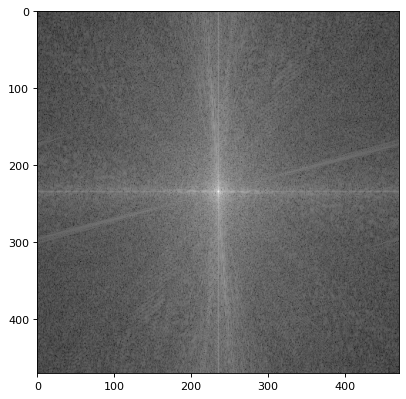

In [13]:
#from here we can now easily use the fft function found in Skimage
dark_image_grey_fourier = np.fft.fftshift(np.fft.fft2(dark_image_grey))
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(np.log(abs(dark_image_grey_fourier)), cmap='gray');

In the image we can see two very clear distortions. The white vertical and horizontal lines refer to the sharp horizontal and vertical elements of the image. Let us enact Fourier Transformation adjustment while retaining the colors of the original image.

In [14]:
def fourier_transform_rgb(image):
    f_size = 25
    transformed_channels = []
    for i in range(3):
        rgb_fft = np.fft.fftshift(np.fft.fft2((image[:, :, i])))
        rgb_fft[:225, 235:237] = 1
        rgb_fft[-225:,235:237] = 1
        transformed_channels.append(abs(np.fft.ifft2(rgb_fft)))
    
    final_image = np.dstack([transformed_channels[0].astype(int), 
                             transformed_channels[1].astype(int), 
                             transformed_channels[2].astype(int)])
    
    fig, ax = plt.subplots(1, 2, figsize=(17,12))
    ax[0].imshow(image)
    ax[0].set_title('Original Image', fontsize = f_size)
    ax[0].set_axis_off()
    
    ax[1].imshow(final_image)
    ax[1].set_title('Transformed Image', fontsize = f_size)
    ax[1].set_axis_off()
    
    fig.tight_layout()

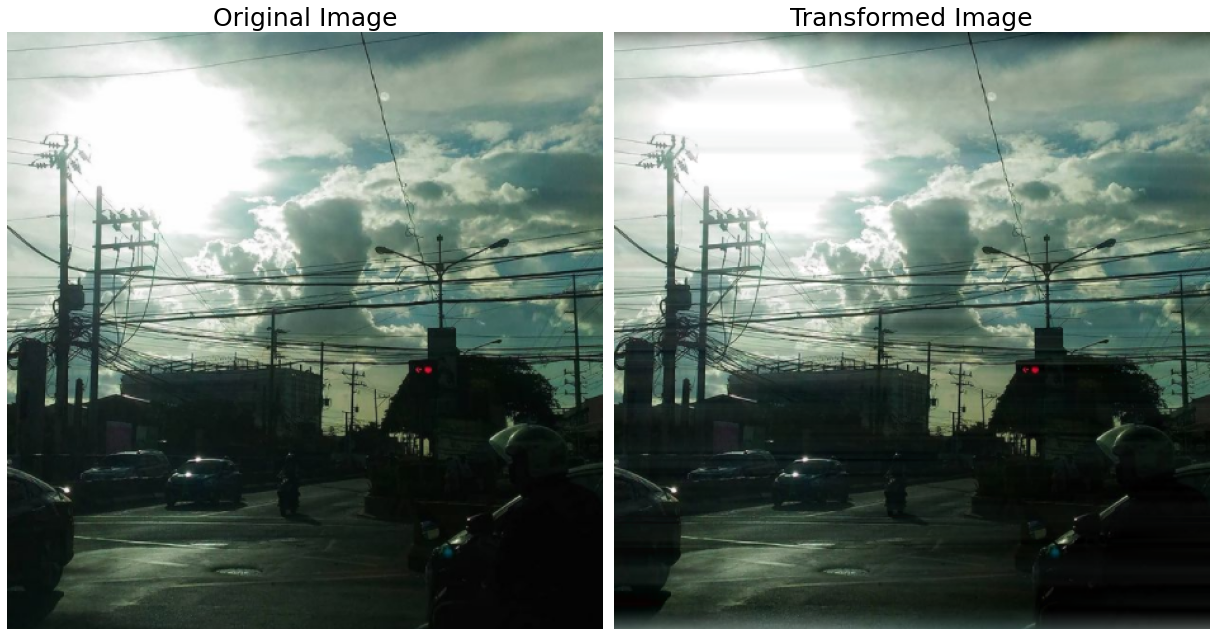

### Resources:

- https://www.math.cuhk.edu.hk/~lmlui/dct.pdf

- https://www.youtube.com/watch?v=tW3Hc0Wrgl0
